In [4]:
import numpy as np
import pandas as pd
from mlxtend.plotting import plot_decision_regions

In [6]:
df=pd.DataFrame()

In [7]:
df['X1'] =  [1,2,3,4,5,6,7,8,9,9]
df['X2'] =  [5,3,6,8,1,9,5,8,9,2]
df['label']=[1,1,0,1,0,1,0,1,0,0]

In [8]:
df

,X1,X2,label
0,1,5,1
1,2,3,1
2,3,6,0
3,4,8,1
4,5,1,0
5,6,9,1
6,7,5,0
7,8,8,1
8,9,9,0
9,9,2,0


<Axes: xlabel='X1', ylabel='X2'>

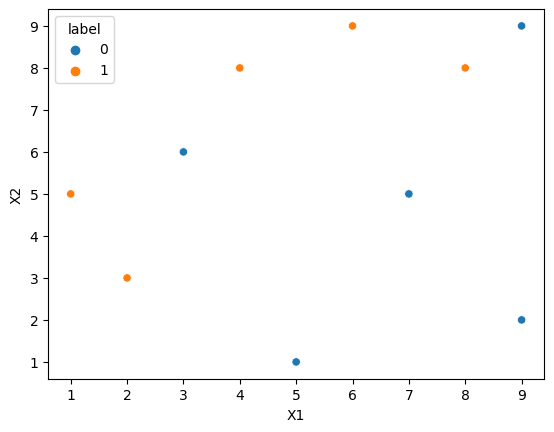

In [9]:
import seaborn as sns
sns.scatterplot(x=df['X1'],y=df['X2'],hue = df['label'])

step 1

In [10]:
df['weights']=1/df.shape[0]

In [11]:
df

,X1,X2,label,weights
0,1,5,1,0.1
1,2,3,1,0.1
2,3,6,0,0.1
3,4,8,1,0.1
4,5,1,0,0.1
5,6,9,1,0.1
6,7,5,0,0.1
7,8,8,1,0.1
8,9,9,0,0.1
9,9,2,0,0.1


In [13]:
from sklearn.tree import DecisionTreeClassifier

In [14]:
dt1=DecisionTreeClassifier(max_depth=1)

In [25]:
x=df.iloc[:,:2].values
y=df.iloc[:,2].values

s2 - train 1st model


In [28]:
dt1.fit(x,y)

DecisionTreeClassifier(max_depth=1)

[Text(0.5, 0.75, 'x[1] <= 2.5\ngini = 0.5\nsamples = 10\nvalue = [5, 5]'),
 Text(0.25, 0.25, 'gini = 0.0\nsamples = 2\nvalue = [2, 0]'),
 Text(0.75, 0.25, 'gini = 0.469\nsamples = 8\nvalue = [3, 5]')]

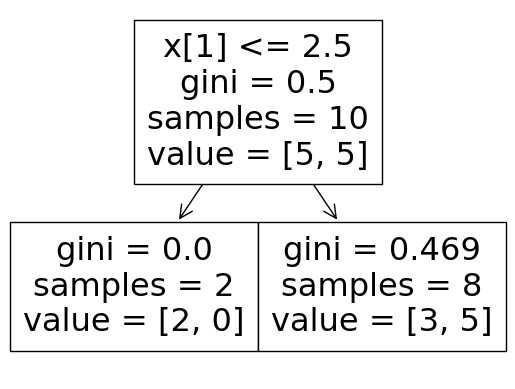

In [29]:
from sklearn.tree import plot_tree
plot_tree(dt1)

<Axes: >

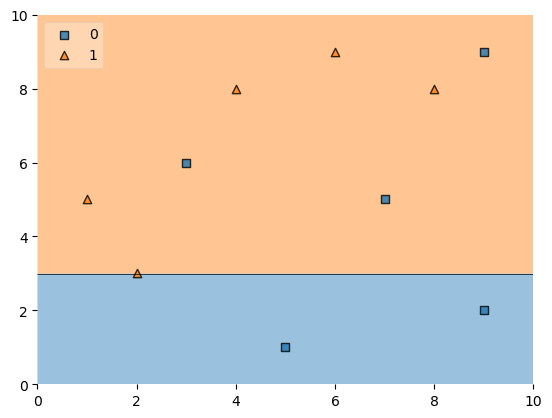

In [30]:
plot_decision_regions(x,y,clf=dt1,legend=2)

In [34]:
df['y_pred']=dt1.predict(x)
df

,X1,X2,label,weights,y_pred
0,1,5,1,0.1,1
1,2,3,1,0.1,1
2,3,6,0,0.1,1
3,4,8,1,0.1,1
4,5,1,0,0.1,0
5,6,9,1,0.1,1
6,7,5,0,0.1,1
7,8,8,1,0.1,1
8,9,9,0,0.1,1
9,9,2,0,0.1,0


In [38]:
def calculate_model_weight(error):
    return 0.5*np.log((1-error)/(error))

st 3 - caculate model weight

In [39]:
alpha1= calculate_model_weight(0.3)
alpha1

0.42364893019360184

St4 - update weight 

In [60]:
def update_row_weight(row,alpha=0.423):
    if row['label']==row['y_pred']:
        return row['weights']*np.exp(-alpha)
    else :
        return row['weights']*np.exp(+alpha)

In [61]:
df["update_weight"]= df.apply(update_row_weight,axis=1)

In [62]:
df

,X1,X2,label,weights,y_pred,update_weight
0,1,5,1,0.1,1,0.065508
1,2,3,1,0.1,1,0.065508
2,3,6,0,0.1,1,0.152653
3,4,8,1,0.1,1,0.065508
4,5,1,0,0.1,0,0.065508
5,6,9,1,0.1,1,0.065508
6,7,5,0,0.1,1,0.152653
7,8,8,1,0.1,1,0.065508
8,9,9,0,0.1,1,0.152653
9,9,2,0,0.1,0,0.065508


In [64]:
sum_U_W = df['update_weight'].sum()
sum_U_W

0.9165153319682015

In [66]:
df['normalied_weight']= df['update_weight']/df['update_weight'].sum()
df

,X1,X2,label,weights,y_pred,update_weight,normalied_weight
0,1,5,1,0.1,1,0.065508,0.071475
1,2,3,1,0.1,1,0.065508,0.071475
2,3,6,0,0.1,1,0.152653,0.166559
3,4,8,1,0.1,1,0.065508,0.071475
4,5,1,0,0.1,0,0.065508,0.071475
5,6,9,1,0.1,1,0.065508,0.071475
6,7,5,0,0.1,1,0.152653,0.166559
7,8,8,1,0.1,1,0.065508,0.071475
8,9,9,0,0.1,1,0.152653,0.166559
9,9,2,0,0.1,0,0.065508,0.071475


In [68]:
df['normalied_weight'].sum()



1.0

In [72]:
df['cumsum_upper'] = np.cumsum(df['normalied_weight'])

In [73]:
df['cumsum_lower']= df['cumsum_upper']-df['normalied_weight']

In [74]:
df

,X1,X2,label,weights,y_pred,update_weight,normalied_weight,cumsus_upper,cumsum_upper,cumsum_lower
0,1,5,1,0.1,1,0.065508,0.071475,0.071475,0.071475,0.000000
1,2,3,1,0.1,1,0.065508,0.071475,0.142950,0.142950,0.071475
2,3,6,0,0.1,1,0.152653,0.166559,0.309508,0.309508,0.142950
3,4,8,1,0.1,1,0.065508,0.071475,0.380983,0.380983,0.309508
4,5,1,0,0.1,0,0.065508,0.071475,0.452458,0.452458,0.380983
5,6,9,1,0.1,1,0.065508,0.071475,0.523933,0.523933,0.452458
6,7,5,0,0.1,1,0.152653,0.166559,0.690492,0.690492,0.523933
7,8,8,1,0.1,1,0.065508,0.071475,0.761967,0.761967,0.690492
8,9,9,0,0.1,1,0.152653,0.166559,0.928525,0.928525,0.761967
9,9,2,0,0.1,0,0.065508,0.071475,1.000000,1.000000,0.928525


In [138]:
df.shape[0]

10

In [139]:
df.iterrows()

<generator object DataFrame.iterrows at 0x0000022CC03C7120>

In [115]:
def creat_new_dataset(df):
    indice=[]

    for i in range(df.shape[0]):
        a=np.random.random()
        for index, row in df.iterrows():
            if row['cumsum_upper'] > a and a> row['cumsum_lower']:
                indice.append(index)

    return indice

In [116]:
index_values = creat_new_dataset(df)
index_values

[2, 9, 1, 5, 3, 6, 1, 2, 9, 2]

In [87]:
second_df=df.iloc[index_values,[0,1,2,3]]
second_df

,X1,X2,label,weights
6,7,5,0,0.1
6,7,5,0,0.1
7,8,8,1,0.1
2,3,6,0,0.1
4,5,1,0,0.1
7,8,8,1,0.1
5,6,9,1,0.1
2,3,6,0,0.1
8,9,9,0,0.1
1,2,3,1,0.1


In [88]:
dt2=DecisionTreeClassifier(max_depth=1)


In [89]:
x=second_df.iloc[:,0:2].values
y=second_df.iloc[:,2].values

In [90]:
dt2.fit(x,y)

DecisionTreeClassifier(max_depth=1)

[Text(0.5, 0.75, 'x[1] <= 7.0\ngini = 0.48\nsamples = 10\nvalue = [6, 4]'),
 Text(0.25, 0.25, 'gini = 0.278\nsamples = 6\nvalue = [5, 1]'),
 Text(0.75, 0.25, 'gini = 0.375\nsamples = 4\nvalue = [1, 3]')]

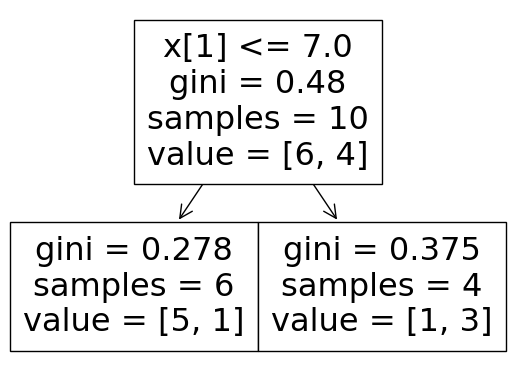

In [91]:
plot_tree(dt2)

<Axes: >

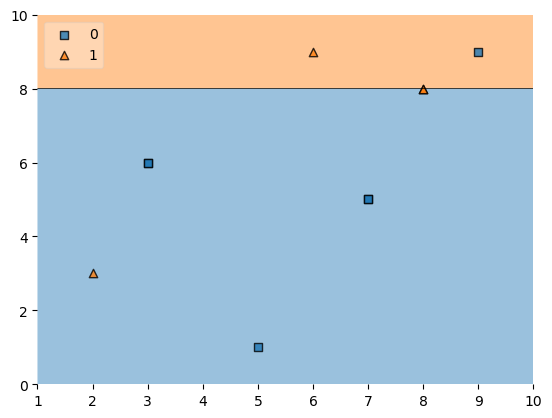

In [92]:
plot_decision_regions(x,y,clf=dt2,legend=2)

In [93]:
second_df['y_pred']=dt2.predict(x)

In [94]:
second_df

,X1,X2,label,weights,y_pred
6,7,5,0,0.1,0
6,7,5,0,0.1,0
7,8,8,1,0.1,1
2,3,6,0,0.1,0
4,5,1,0,0.1,0
7,8,8,1,0.1,1
5,6,9,1,0.1,1
2,3,6,0,0.1,0
8,9,9,0,0.1,1
1,2,3,1,0.1,0


In [96]:
alpha2=calculate_model_weight(0.2)
alpha2

0.6931471805599453

In [98]:
def upedate_row_weight(row,alpha=0.6931):
    if row['label']==row['y_pred']:
        return row['weights']*np.exp(-alpha)
    else:
        return row['weights']*np.exp(alpha)

In [103]:
second_df['update_weights']= second_df.apply(upedate_row_weight,axis=1)

In [104]:
second_df

,X1,X2,label,weights,y_pred,upedate_weights,normalized_Weight,update_weights
6,7,5,0,0.1,0,0.050002,0.062503,0.050002
6,7,5,0,0.1,0,0.050002,0.062503,0.050002
7,8,8,1,0.1,1,0.050002,0.062503,0.050002
2,3,6,0,0.1,0,0.050002,0.062503,0.050002
4,5,1,0,0.1,0,0.050002,0.062503,0.050002
7,8,8,1,0.1,1,0.050002,0.062503,0.050002
5,6,9,1,0.1,1,0.050002,0.062503,0.050002
2,3,6,0,0.1,0,0.050002,0.062503,0.050002
8,9,9,0,0.1,1,0.199991,0.249988,0.199991
1,2,3,1,0.1,0,0.199991,0.249988,0.199991


In [105]:
second_df['normalized_Weight']=second_df['update_weights']/second_df['update_weights'].sum()
second_df

,X1,X2,label,weights,y_pred,upedate_weights,normalized_Weight,update_weights
6,7,5,0,0.1,0,0.050002,0.062503,0.050002
6,7,5,0,0.1,0,0.050002,0.062503,0.050002
7,8,8,1,0.1,1,0.050002,0.062503,0.050002
2,3,6,0,0.1,0,0.050002,0.062503,0.050002
4,5,1,0,0.1,0,0.050002,0.062503,0.050002
7,8,8,1,0.1,1,0.050002,0.062503,0.050002
5,6,9,1,0.1,1,0.050002,0.062503,0.050002
2,3,6,0,0.1,0,0.050002,0.062503,0.050002
8,9,9,0,0.1,1,0.199991,0.249988,0.199991
1,2,3,1,0.1,0,0.199991,0.249988,0.199991


In [107]:
second_df['cumsum_upper']=np.cumsum(second_df['normalized_Weight'])

In [108]:
second_df['cumsum_lower']=second_df['cumsum_upper']-second_df['normalized_Weight']

In [109]:
second_df

,X1,X2,label,weights,y_pred,upedate_weights,normalized_Weight,update_weights,cumsum_upper,cumsum_lower
6,7,5,0,0.1,0,0.050002,0.062503,0.050002,0.062503,0.000000
6,7,5,0,0.1,0,0.050002,0.062503,0.050002,0.125006,0.062503
7,8,8,1,0.1,1,0.050002,0.062503,0.050002,0.187509,0.125006
2,3,6,0,0.1,0,0.050002,0.062503,0.050002,0.250012,0.187509
4,5,1,0,0.1,0,0.050002,0.062503,0.050002,0.312515,0.250012
7,8,8,1,0.1,1,0.050002,0.062503,0.050002,0.375018,0.312515
5,6,9,1,0.1,1,0.050002,0.062503,0.050002,0.437521,0.375018
2,3,6,0,0.1,0,0.050002,0.062503,0.050002,0.500024,0.437521
8,9,9,0,0.1,1,0.199991,0.249988,0.199991,0.750012,0.500024
1,2,3,1,0.1,0,0.199991,0.249988,0.199991,1.000000,0.750012


In [111]:
index_values = creat_new_dataset(second_df)

In [112]:
index_values

[8, 6, 7, 2, 7, 7, 4, 7, 6, 7]

In [114]:
third_df= second_df.iloc[index_values,[0,1,2,3]]
third_df

,X1,X2,label,weights
8,9,9,0,0.1
5,6,9,1,0.1
2,3,6,0,0.1
7,8,8,1,0.1
2,3,6,0,0.1
2,3,6,0,0.1
4,5,1,0,0.1
2,3,6,0,0.1
5,6,9,1,0.1
2,3,6,0,0.1


In [118]:
dt3=DecisionTreeClassifier(max_depth=1)
x=third_df.iloc[:,0:2].values
y=third_df.iloc[:,2].values

In [119]:
dt3.fit(x,y)

DecisionTreeClassifier(max_depth=1)

[Text(0.5, 0.75, 'x[0] <= 5.5\ngini = 0.42\nsamples = 10\nvalue = [7, 3]'),
 Text(0.25, 0.25, 'gini = 0.0\nsamples = 6\nvalue = [6, 0]'),
 Text(0.75, 0.25, 'gini = 0.375\nsamples = 4\nvalue = [1, 3]')]

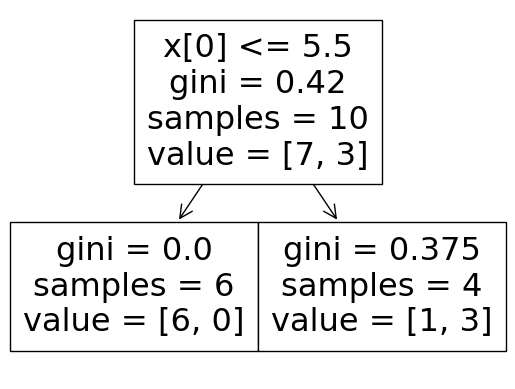

In [120]:
plot_tree(dt3)

<Axes: >

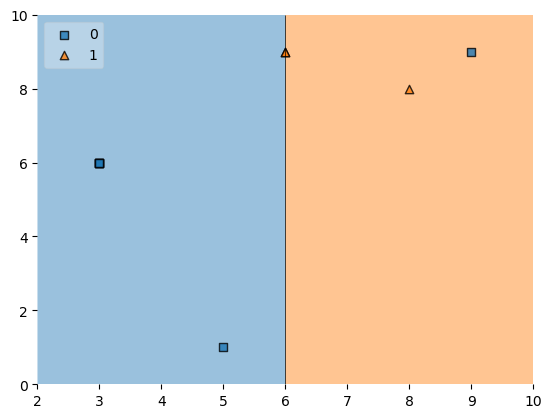

In [121]:
plot_decision_regions(x,y,clf=dt3,legend=2)

In [123]:
third_df['y_pred']=dt3.predict(x)

In [124]:
third_df

,X1,X2,label,weights,y_pred
8,9,9,0,0.1,1
5,6,9,1,0.1,1
2,3,6,0,0.1,0
7,8,8,1,0.1,1
2,3,6,0,0.1,0
2,3,6,0,0.1,0
4,5,1,0,0.1,0
2,3,6,0,0.1,0
5,6,9,1,0.1,1
2,3,6,0,0.1,0


In [125]:
alpha3=calculate_model_weight(0.7)
alpha3

-0.4236489301936017

In [126]:
print(alpha1, alpha2, alpha3)

0.42364893019360184 0.6931471805599453 -0.4236489301936017


In [129]:
query=np.array([1,5]).reshape(1,2)


In [128]:
dt1.predict(query)

array([1], dtype=int64)

In [130]:
dt2.predict(query)

array([0], dtype=int64)

In [131]:
dt3.predict(query)

array([0], dtype=int64)

In [132]:
alpha1*1+alpha2*0+alpha3*0

0.42364893019360184

In [133]:
np.sign(alpha1*1+alpha2*0+alpha3*0)

1.0

In [137]:
query=np.array([9,9]).reshape(1,2)
print(dt1.predict(query))
print(dt2.predict(query))
print(dt3.predict(query))
print(alpha1*dt1.predict(query)+alpha2*dt2.predict(query)+alpha3*dt3.predict(query))
print(np.sign(alpha1*dt1.predict(query)+alpha2*dt2.predict(query)+alpha3*dt3.predict(query)))

[1]
[1]
[1]
[0.69314718]
[1.]
